<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [80]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Varios
# ==============================================================================
from scipy import stats

import warnings
import os
import missingno as msno
import random
from fitter import Fitter, get_common_distributions

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


<div class="alert alert-block alert-info">
    <b>Import</b></div>

In [81]:
# Lectura del file txt para ver que hay de relevante en su contenido.
# ============================================================
with open('C:\\Users\ASUSPC\\IT_academy\\\Tasca_M5\\Tasca_M5_T02\\housing data description.txt', 'r') as file:
    contenido = file.read()

print(contenido)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

Por los datos incluidos en el file txt, podemos ver que la información del punto 7 "Attribute Information" sirve de header para las columnas de nuestro dataframe.

In [82]:
df = pd.read_csv("C:\\Users\ASUSPC\\IT_academy\\\Tasca_M5\\Tasca_M5_T02\\housing data.csv", header=None, names=["CRIM","ZN","INDUS", "CHAS", "NOX", "RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

In [83]:
#Entorno de trabajo
# ==================
print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M5\Tasca_M5_T02


<div class="alert alert-block alert-info">
    <b>Examen datos</b></div>

In [84]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [86]:
df.shape

(506, 14)

In [87]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [88]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [89]:
# Inspeccionamos 'CHAS' y 'RAD'
# ===================================

print(df['CHAS'].unique())
print(df['RAD'].unique())

[0 1]
[ 1  2  3  5  4  8  6  7 24]


* La variable CHAS es una variable binaria y como solo puede tomar dos valores posibles, se clasifica como una variable discreta o categorica segun usos.

* Lo mismo pasa con 'RAD', cuya naturaleza discreta deriva del hecho que sus valores están limitados a un conjunto específico de opciones y cuyos valores mismos representan una categoría de accesibilidad a las carreteras. Dependiendo del camino que escojamos, podria ser sensato utilizar alguna tecnica de encoding.

In [90]:
# Comprobar la existencia de NaN y null
# ==========================================
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

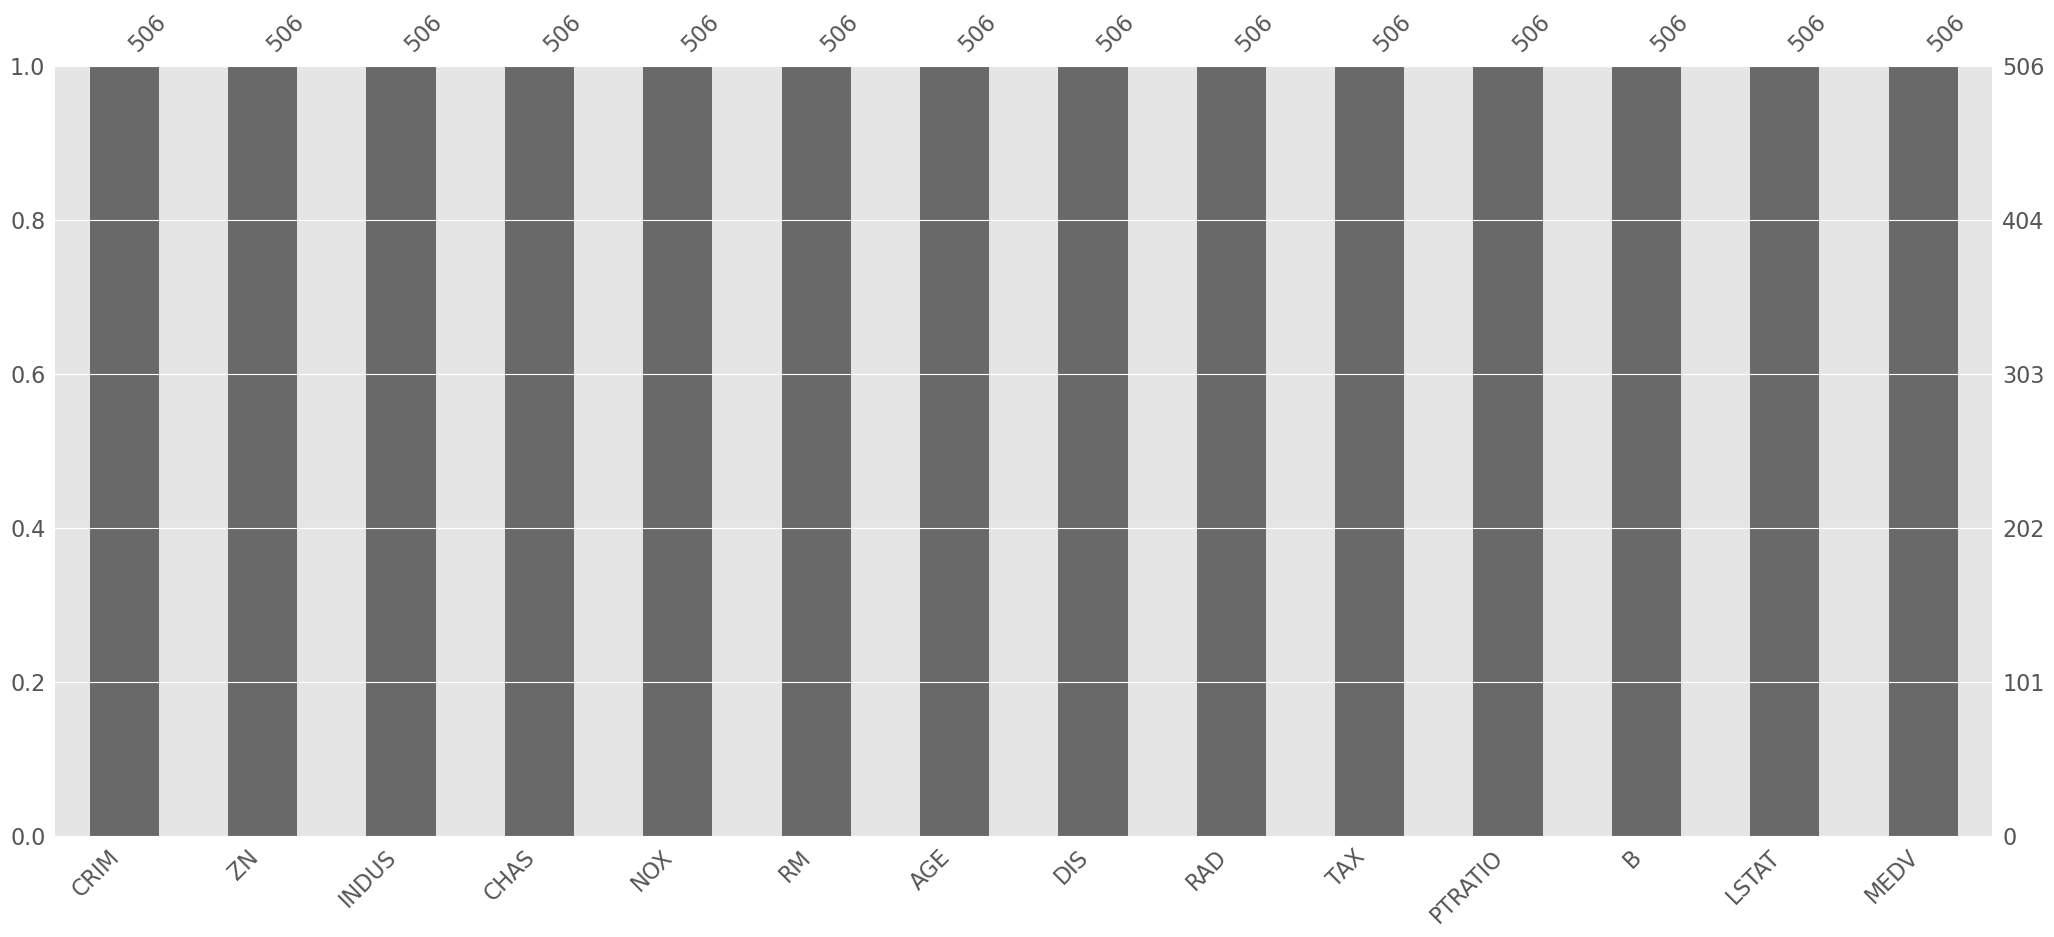

In [91]:
# Barplot de los nans
# ==================
msno.bar(df)
plt.show()

Al parecer no tenemos Nan o null.

<div class="alert alert-block alert-info">
    <b>Visualización variables</b></div>

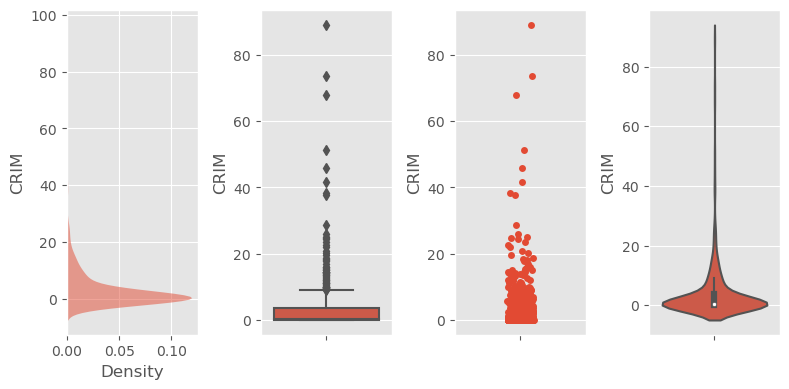

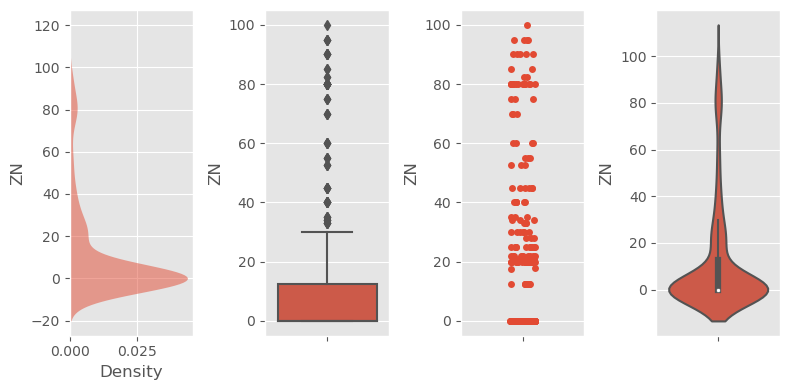

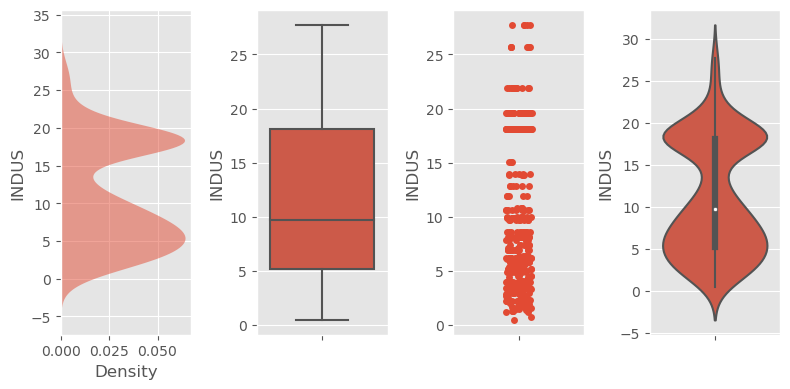

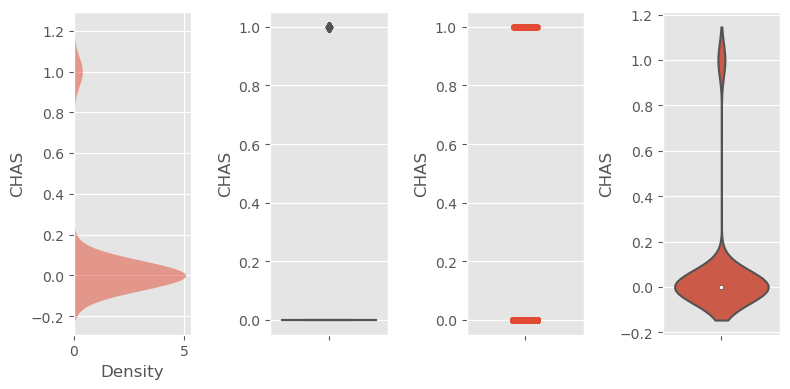

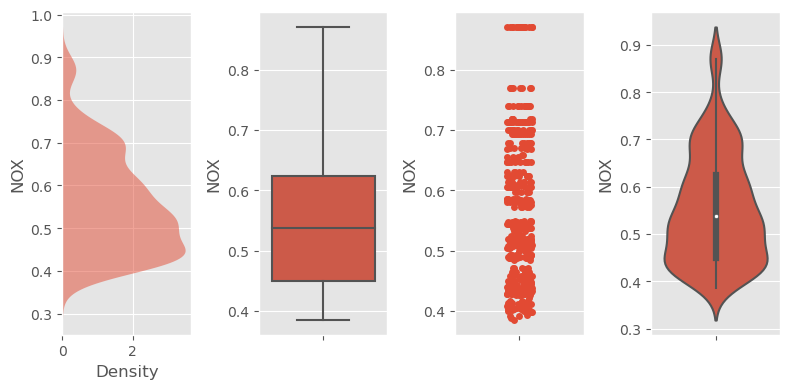

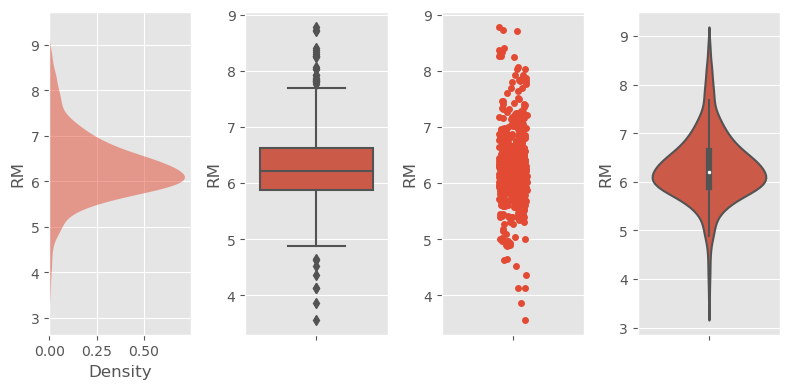

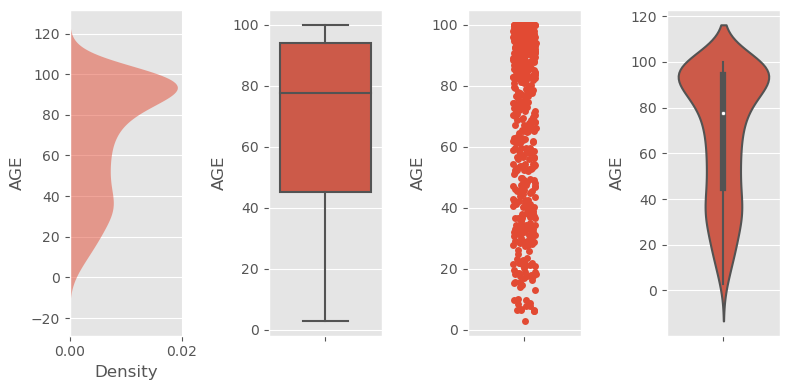

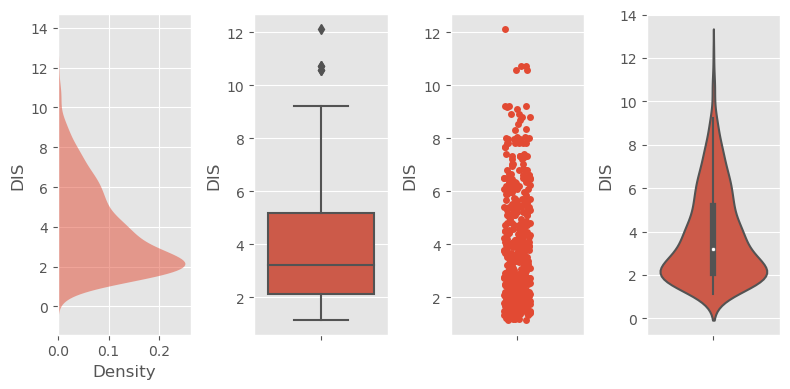

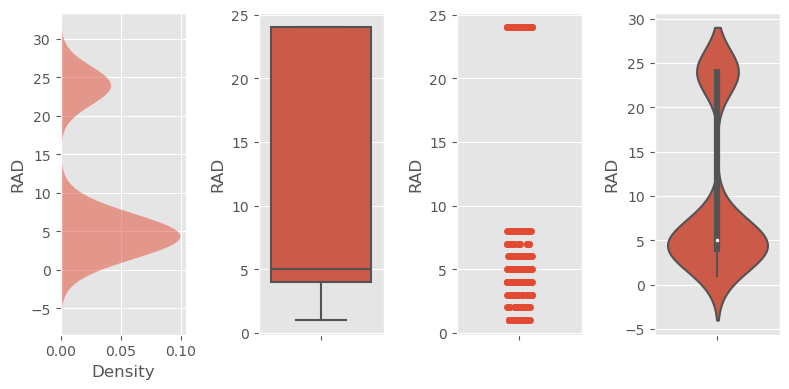

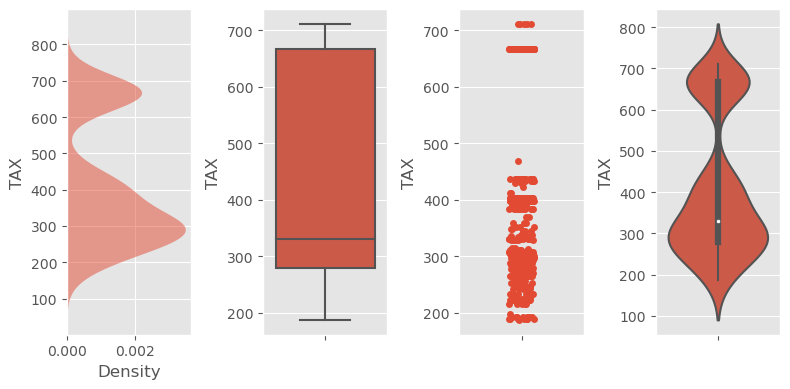

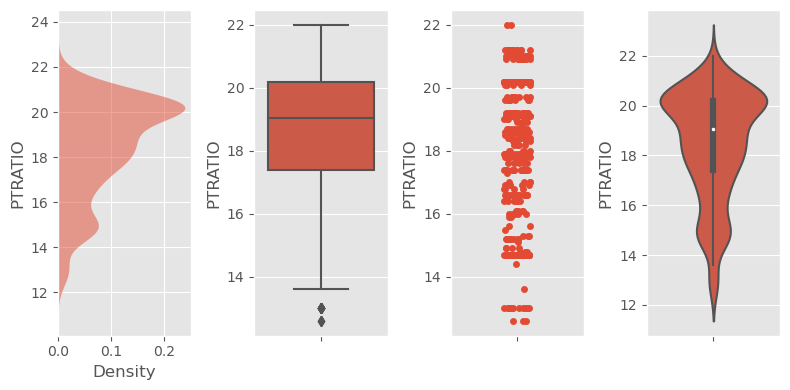

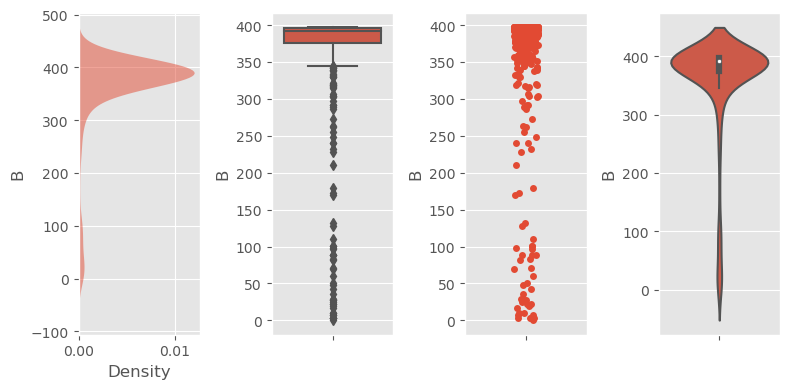

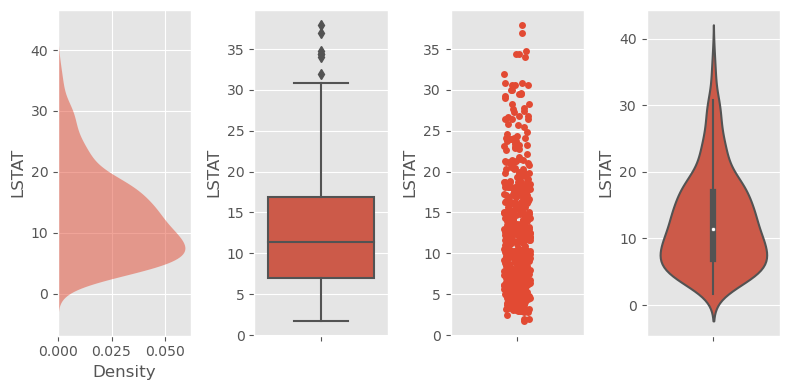

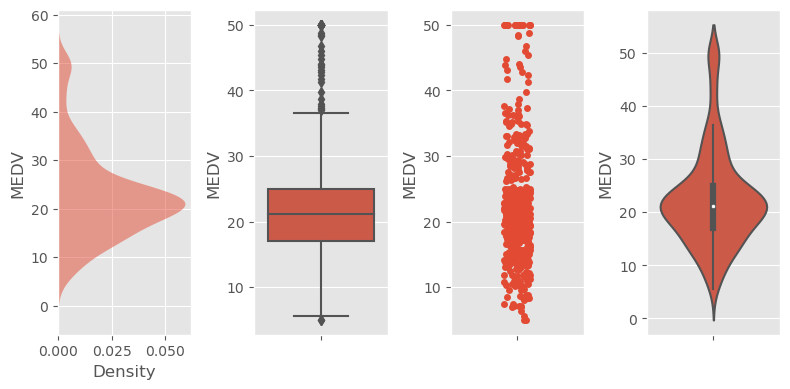

In [92]:
# Distribuciones: densidad, boxplot, astripchart, violinplot
# =======================================================================
for i in df:
    fig, axs = plt.subplots(ncols=4, figsize=(8, 4))
    sns.kdeplot(
       data=df, y=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=df, y=i,ax=axs[1])
    sns.stripplot(y= i,data=df,ax=axs[2])
    sns.violinplot(data=df, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

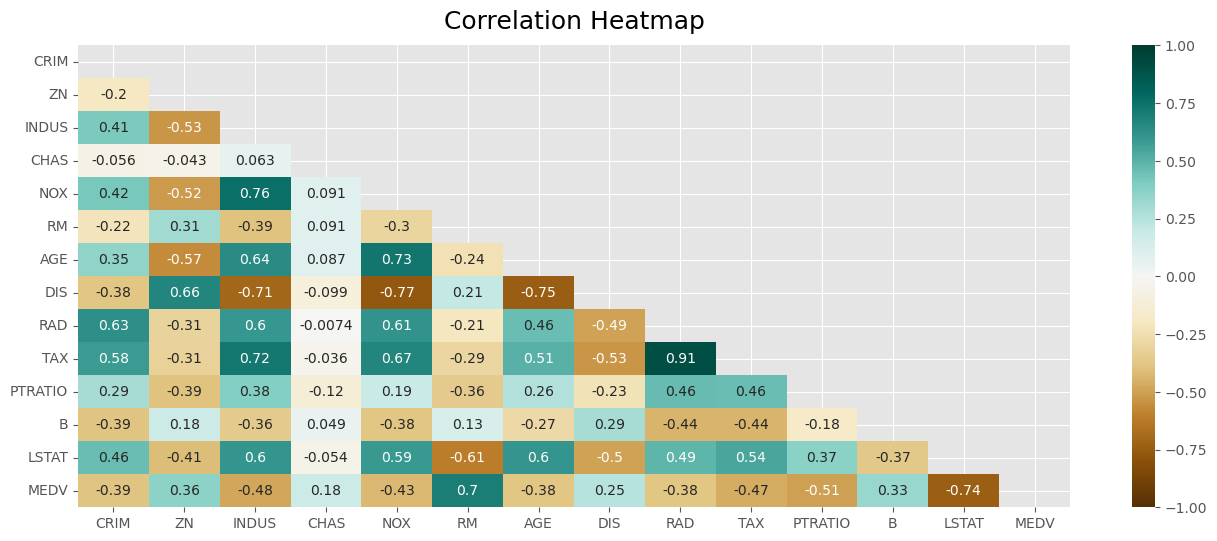

In [93]:
#Visualizamos la correlación entre variables
# =======================================================================
plt.figure(figsize=(16, 6))
matrix = np.triu(df.corr())
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=matrix)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show()

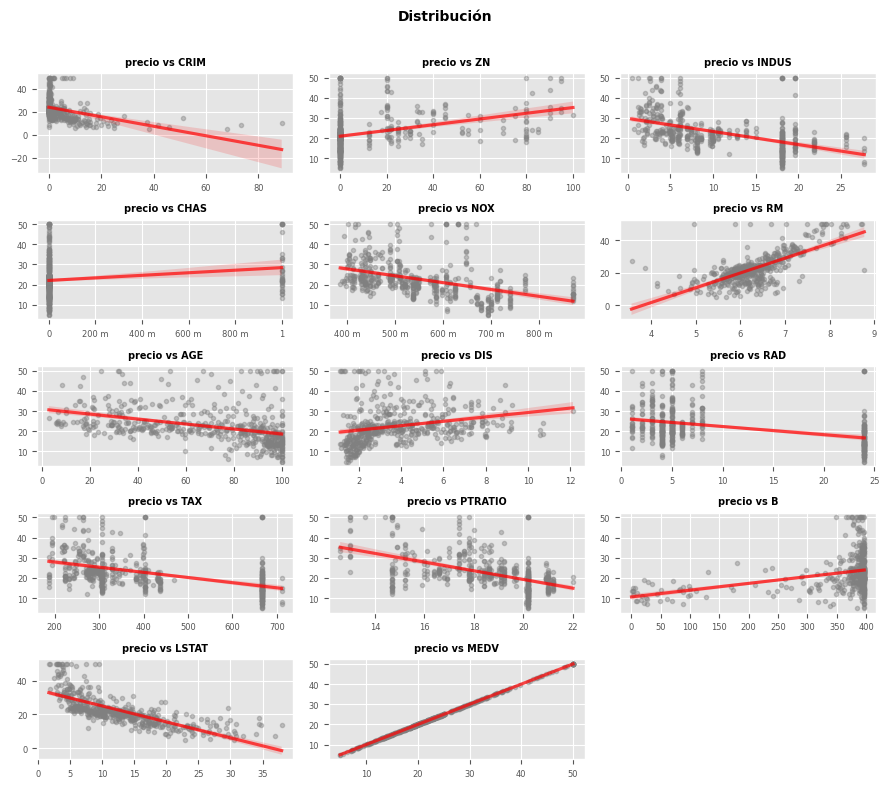

In [94]:
# Gráfico de distribución para cada variable numérica en relación a la variable target
# ==============================================================================
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(9, 8))
axes = axes.flat

for i, colum in enumerate(df):
    sns.regplot(
        x           = df[colum],
        y           = df['MEDV'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

#Se eliminan los axes vacíos
#=============================
for i in [14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución', fontsize = 10, fontweight = "bold");

In [95]:
#Correlacion de 'MEDV' con las otras variables
# ==============================================
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Usamos el VIF (Factor de Inflación de la Varianza). En general, una correlación puede ser problematica cuando su VIF > 5.

In [96]:
# Crear funcion que calcule el VIF
# ==============================================
def compute_vif(considered_features):
    
    X = df[considered_features]
    # el calculo de la inflación de varianza requiere de una constante
    X['intercept'] = 1
    
    # se crea un dataframe para guardar las vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

#variables consideradas
considered_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']


# calculo del vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
9,TAX,9.205542
8,RAD,7.808198
4,NOX,4.586920
7,DIS,4.396007
2,INDUS,3.992503
13,MEDV,3.855684
12,LSTAT,3.581585
6,AGE,3.100843
1,ZN,2.352186
5,RM,2.260374


__El analisis inicial parece indicar que:__ 
* 'RM' y 'LSTAT' tienen una alta relación con la variable target.
* Algunas variables contienen outliers.
* 'TAX' y 'RAD' tienen una fuerte correlación. Como podria generar redundancia o multicolinealidad, dependiendo del modelo que quisieramos usar, podria ser sensato eliminar una de ellas. 
* En general, las variables no tienen distribución normal.

<div class="alert alert-info" role="alert">
  <strong>Exercici 1:</strong> 
    <p> Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. </p>
</div> 

In [97]:
# Partimos los datos
# ===============================
X = df.drop('MEDV', axis = 1)
Y = df['MEDV'] 

In [98]:
# X, Y shape
# ===============================
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (506, 13)
Y shape:  (506,)


In [99]:
# Dividimos los datos en conjuntos de entrenamiento y prueba con una proporción de 80/20
# El random_state hara que la muestra sea siempre la misma.
# ==============================================================================
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

Exploramos el resultado

In [100]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [101]:
X_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.55,11.90,10.85,0.07,0.55,6.29,67.72,3.83,9.53,405.12,18.42,358.80,12.48
std,8.69,23.47,6.74,0.25,0.11,0.69,28.34,2.06,8.70,168.34,2.19,89.05,7.04
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,188.00,12.60,0.32,1.73
25%,0.08,0.00,5.13,0.00,0.45,5.89,42.28,2.11,4.00,277.00,17.00,376.14,6.84
50%,0.24,0.00,8.56,0.00,0.53,6.21,76.60,3.36,5.00,329.50,19.00,391.48,11.16
75%,3.67,20.00,18.10,0.00,0.62,6.63,93.08,5.23,24.00,666.00,20.20,396.24,16.99
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,10.59,24.00,711.00,22.00,396.90,37.97


In [102]:
X_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,3.86,9.23,12.29,0.07,0.57,6.27,71.96,3.64,9.63,420.57,18.58,348.27,13.35
std,8.29,22.71,7.25,0.25,0.12,0.74,27.27,2.30,8.78,169.59,2.06,99.72,7.53
min,0.01,0.00,0.74,0.00,0.40,4.52,6.50,1.17,1.00,187.00,13.00,2.60,1.98
25%,0.09,0.00,6.12,0.00,0.46,5.88,51.20,1.95,4.00,289.00,17.40,370.43,7.48
50%,0.37,0.00,10.70,0.00,0.55,6.20,82.50,2.85,5.00,391.00,19.10,390.90,12.20
75%,3.92,0.00,18.10,0.00,0.62,6.57,95.38,4.53,24.00,666.00,20.20,396.10,16.70
max,51.14,90.00,27.74,1.00,0.87,8.40,100.00,12.13,24.00,711.00,21.20,396.90,36.98


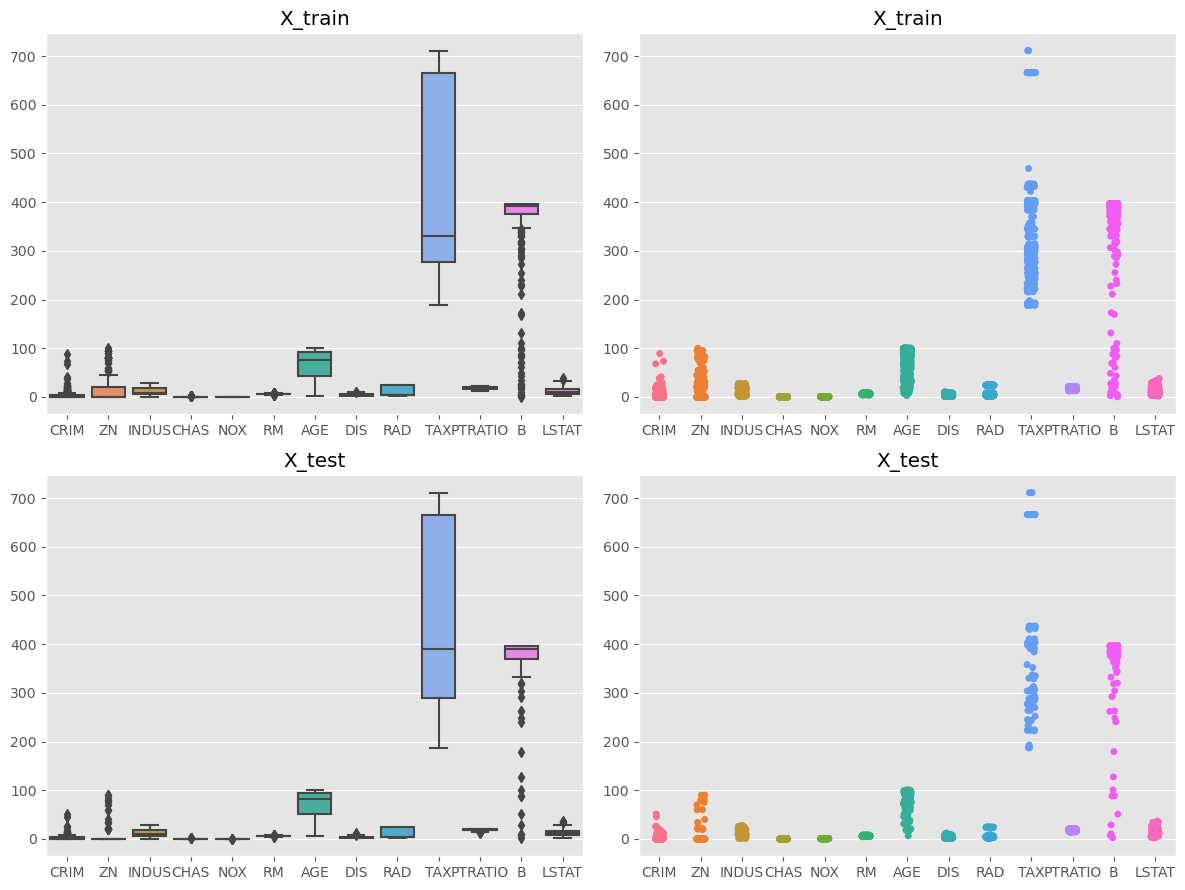

In [103]:
# Visualizamos X_train and X_test
# =========================================
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

plot1=sns.boxplot(data=X_train, ax=ax[0, 0])
ax[0, 0].set_title('X_train')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

plot2=sns.stripplot(data=X_train, ax=ax[0,1])
ax[0, 1].set_title('X_train')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

plot1=sns.boxplot(data=X_test, ax=ax[1,0])
ax[1, 0].set_title('X_test')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

plot2=sns.stripplot(data=X_test, ax=ax[1,1])
ax[1, 1].set_title('X_test')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

fig.tight_layout()

plt.show()


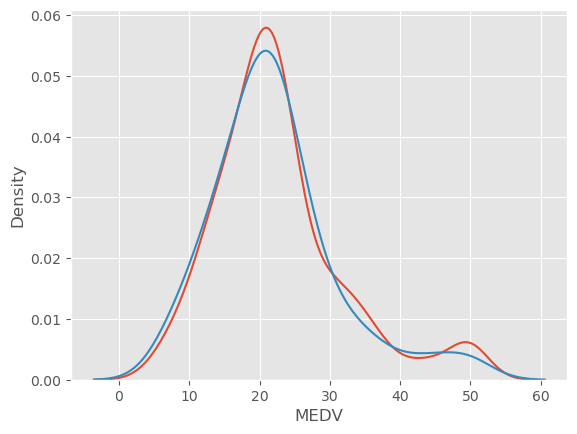

In [104]:
# Visualizamos Y_train and Y_test
# =================================
sns.kdeplot(Y_train)
sns.kdeplot(Y_test)
plt.show()

In [105]:
# Utilizamos el test de shapiro para verificar la hipótesis de una distribución normal
# ==============================================================================
for i in X_train:

    stat, p = stats.shapiro(X_train[i])
    print(f" {i} p-value = {p}")
    alpha = 0.05
    if p > alpha:
       print(f'no se rechaza la hipótesis nula H0')
    else:
       print(f'se rechaza la hipótesis nula H0')

 CRIM p-value = 1.040547691183385e-33
se rechaza la hipótesis nula H0
 ZN p-value = 3.7305515048769575e-30
se rechaza la hipótesis nula H0
 INDUS p-value = 4.566538318918369e-16
se rechaza la hipótesis nula H0
 CHAS p-value = 7.311244917983412e-37
se rechaza la hipótesis nula H0
 NOX p-value = 2.1029718764997707e-12
se rechaza la hipótesis nula H0
 RM p-value = 2.348415018005312e-09
se rechaza la hipótesis nula H0
 AGE p-value = 6.411024029969532e-16
se rechaza la hipótesis nula H0
 DIS p-value = 3.7511325019475364e-14
se rechaza la hipótesis nula H0
 RAD p-value = 5.753600153060204e-27
se rechaza la hipótesis nula H0
 TAX p-value = 1.3404551693456136e-21
se rechaza la hipótesis nula H0
 PTRATIO p-value = 2.5145670169978178e-15
se rechaza la hipótesis nula H0
 B p-value = 4.167482693364148e-33
se rechaza la hipótesis nula H0
 LSTAT p-value = 6.843913890469677e-12
se rechaza la hipótesis nula H0


In [106]:
# Utilizamos el test de shapiro para verificar la hipótesis de distribución normal
# ==============================================================================
for i in X_test:

    stat, p = stats.shapiro(X_test[i])
    print(f" {i} p-value = {p}")
    alpha = 0.05
    if p > alpha:
       print(f'no se rechaza la hipótesis nula H0')
    else:
       print(f'se rechaza la hipótesis nula H0')

 CRIM p-value = 8.723210497201285e-17
se rechaza la hipótesis nula H0
 ZN p-value = 1.4162786270424702e-17
se rechaza la hipótesis nula H0
 INDUS p-value = 5.8156924751529004e-06
se rechaza la hipótesis nula H0
 CHAS p-value = 3.5316870456212186e-20
se rechaza la hipótesis nula H0
 NOX p-value = 0.00014648742217104882
se rechaza la hipótesis nula H0
 RM p-value = 0.002878358354791999
se rechaza la hipótesis nula H0
 AGE p-value = 4.166259870430622e-08
se rechaza la hipótesis nula H0
 DIS p-value = 2.48170306527129e-09
se rechaza la hipótesis nula H0
 RAD p-value = 1.4139571132866513e-13
se rechaza la hipótesis nula H0
 TAX p-value = 4.531990338563219e-09
se rechaza la hipótesis nula H0
 PTRATIO p-value = 1.314309770350519e-06
se rechaza la hipótesis nula H0
 B p-value = 2.260022075523994e-16
se rechaza la hipótesis nula H0
 LSTAT p-value = 1.8066095435642637e-05
se rechaza la hipótesis nula H0


__Tras ulterior comprobación, podemos ver que:__
* 'CRIM', 'ZN', 'DIS', 'PRATIO', 'B' y 'LSTAT' tienen outliers que trataremos con un robustscaler.
* 'INDUS', 'NOX', 'AGE'y 'TAX' se trataran con un minmaxscaler.
* 'CHAS' y 'RAD', por su tipologia, no se trataran.

<div class="alert alert-info" role="alert">
  <strong>Exercici 2:</strong> 
    <p> Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...). </p>
</div> 

In [107]:
# Guardar una copia X_train e X_test para poder compararlos despues
# =======================================================================
X_train_original = X_train.copy()
X_test_original =  X_test.copy()

In [108]:
# Crear robust scaler
#===================
robust_scaler = RobustScaler()

# Aplicar RobustScaler a las columnas seleccionadas en X_train
#=============================================================
X_train[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']] = robust_scaler.fit_transform(X_train[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']])

# Aplicar RobustScaler a las columnas seleccionadas en X_test
#=============================================================
X_test[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']] = robust_scaler.transform(X_test[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']])

In [109]:
# Crear MinMax scaler
#===================
minmax_scaler = MinMaxScaler()

# Aplicar MinMaxScaler a las columnas seleccionadas en X_train
#=============================================================
X_train[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']] = minmax_scaler.fit_transform(X_train[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']])

# Aplicar MinMaxScaler a las columnas seleccionadas en X_test
#=============================================================
X_test[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']] = minmax_scaler.transform(X_test[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']])

In [110]:
X_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,1.01,0.46,0.43,0.07,0.37,0.52,0.71,0.09,9.63,0.44,-0.13,-2.15,0.22
std,2.30,1.14,0.27,0.25,0.25,0.14,0.28,0.73,8.78,0.32,0.64,4.96,0.74
min,-0.06,0.00,0.01,0.00,0.03,0.18,0.04,-0.70,1.00,-0.00,-1.88,-19.34,-0.90
25%,-0.04,0.00,0.21,0.00,0.16,0.44,0.50,-0.45,4.00,0.19,-0.50,-1.05,-0.36
50%,0.03,0.00,0.38,0.00,0.33,0.51,0.82,-0.16,5.00,0.39,0.03,-0.03,0.10
75%,1.02,0.00,0.65,0.00,0.49,0.58,0.95,0.37,24.00,0.91,0.37,0.23,0.55
max,14.16,4.50,1.00,1.00,1.00,0.93,1.00,2.81,24.00,1.00,0.69,0.27,2.54


In [111]:
X_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.92,0.60,0.38,0.07,0.34,0.52,0.67,0.15,9.53,0.42,-0.18,-1.63,0.13
std,2.42,1.17,0.25,0.25,0.24,0.13,0.29,0.66,8.70,0.32,0.69,4.43,0.69
min,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,-0.71,1.00,0.00,-2.00,-19.46,-0.93
25%,-0.05,0.00,0.17,0.00,0.13,0.45,0.41,-0.40,4.00,0.17,-0.63,-0.76,-0.43
50%,0.00,0.00,0.30,0.00,0.30,0.51,0.76,0.00,5.00,0.27,0.00,-0.00,0.00
75%,0.95,1.00,0.65,0.00,0.49,0.59,0.93,0.60,24.00,0.91,0.37,0.24,0.57
max,24.68,5.00,1.00,1.00,1.00,1.00,1.00,2.31,24.00,1.00,0.94,0.27,2.64


<div class="alert alert-info" role="alert">
  <strong>Exercici 3:</strong> 
    <p> Resumeix les noves columnes generades de manera estadística i gràfica </p>
</div> 

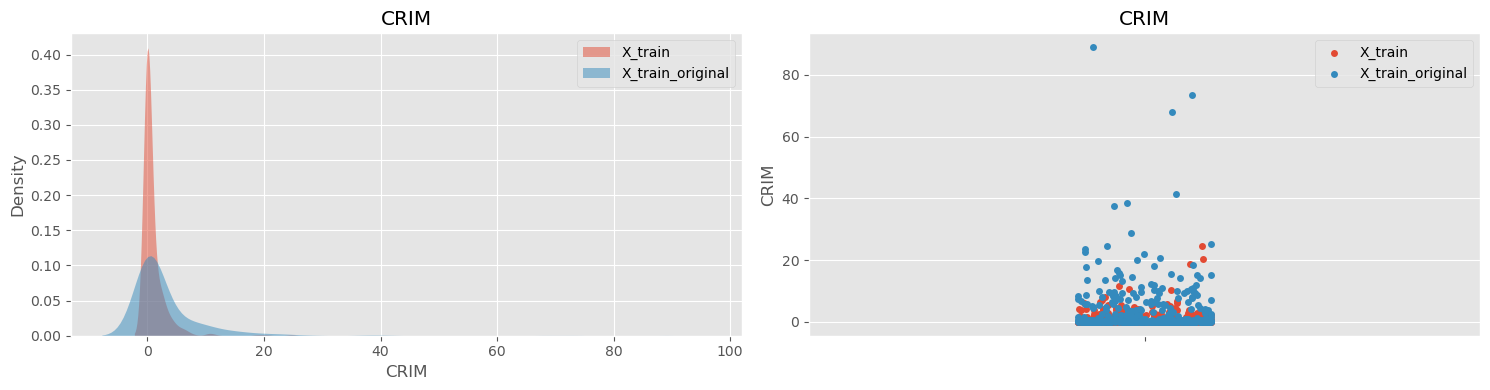

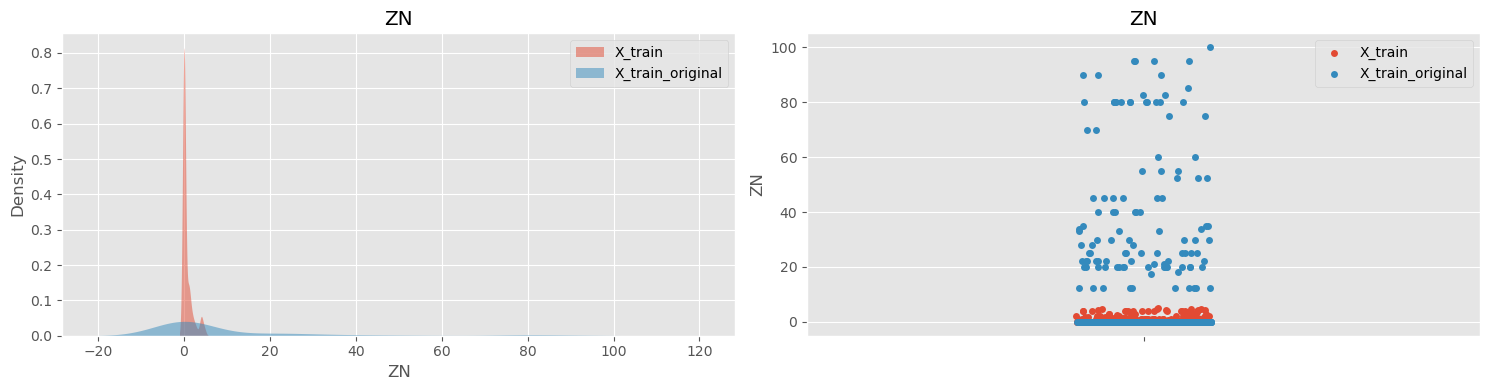

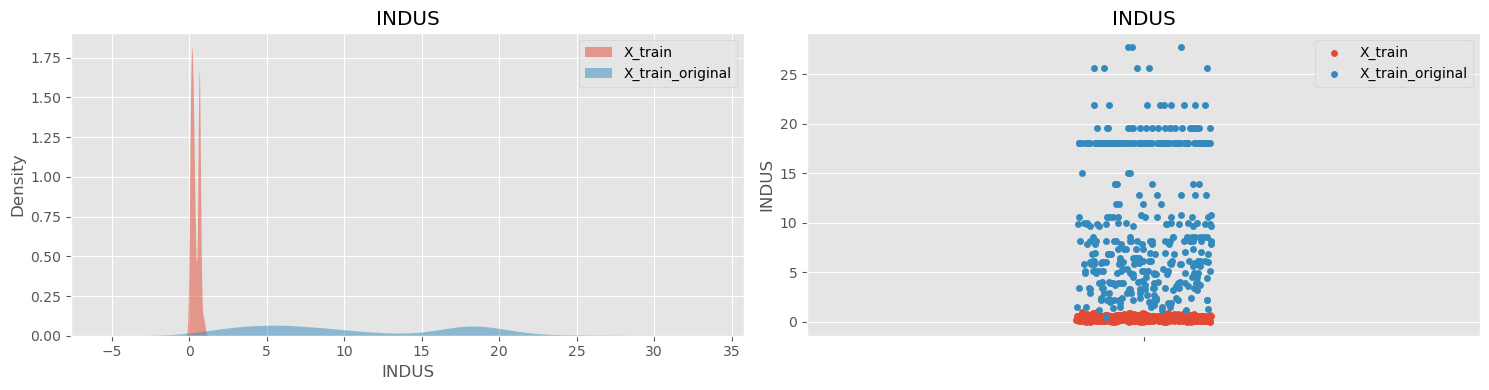

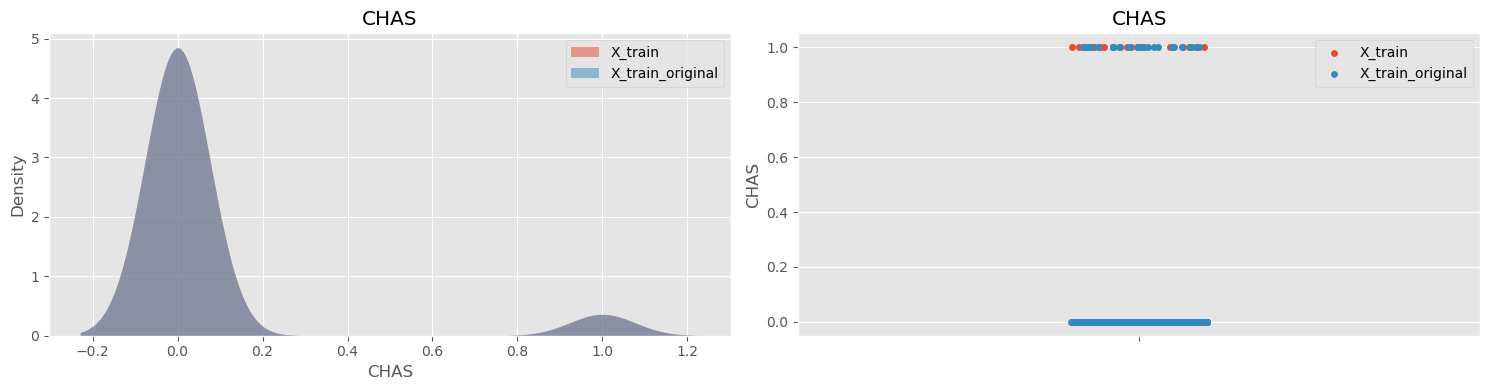

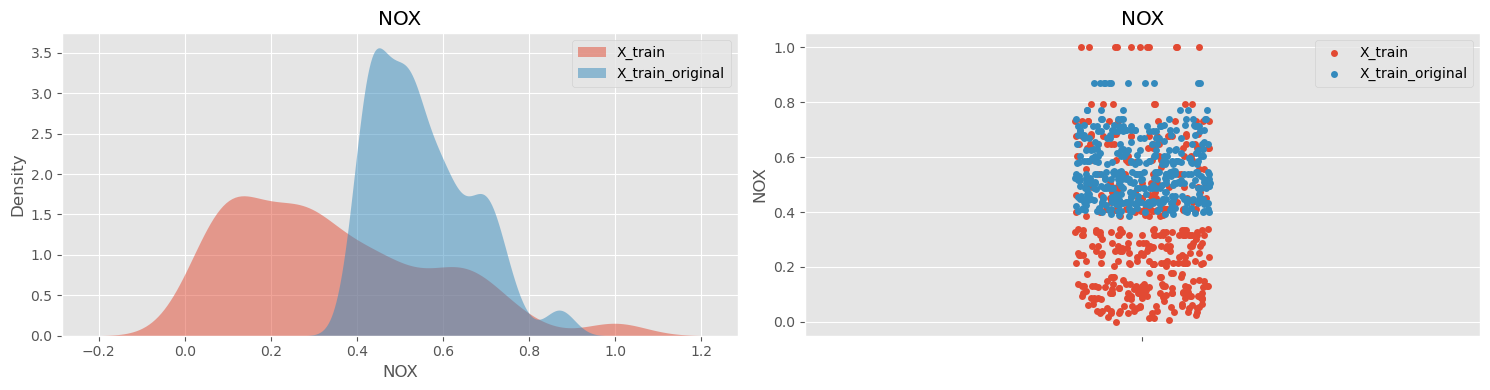

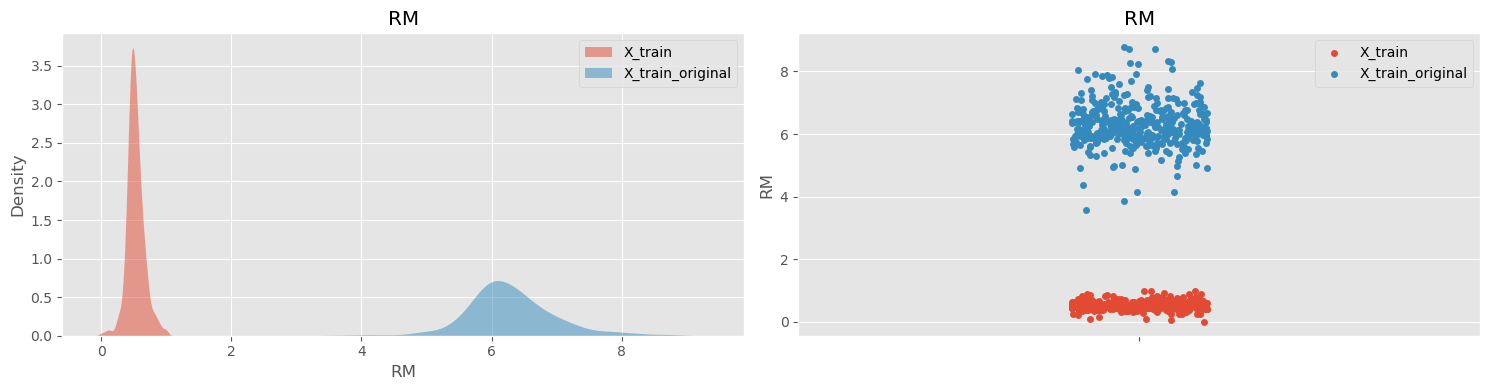

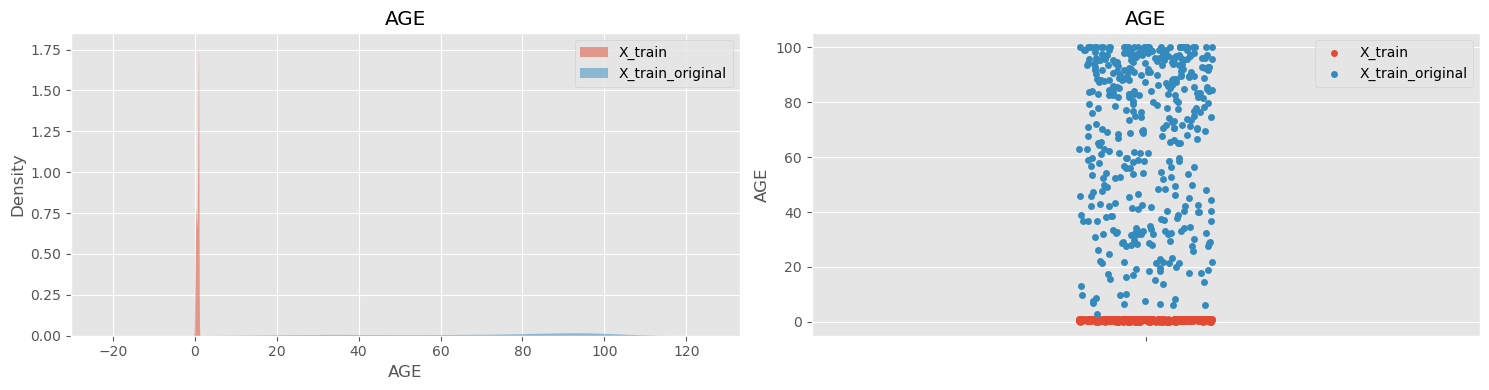

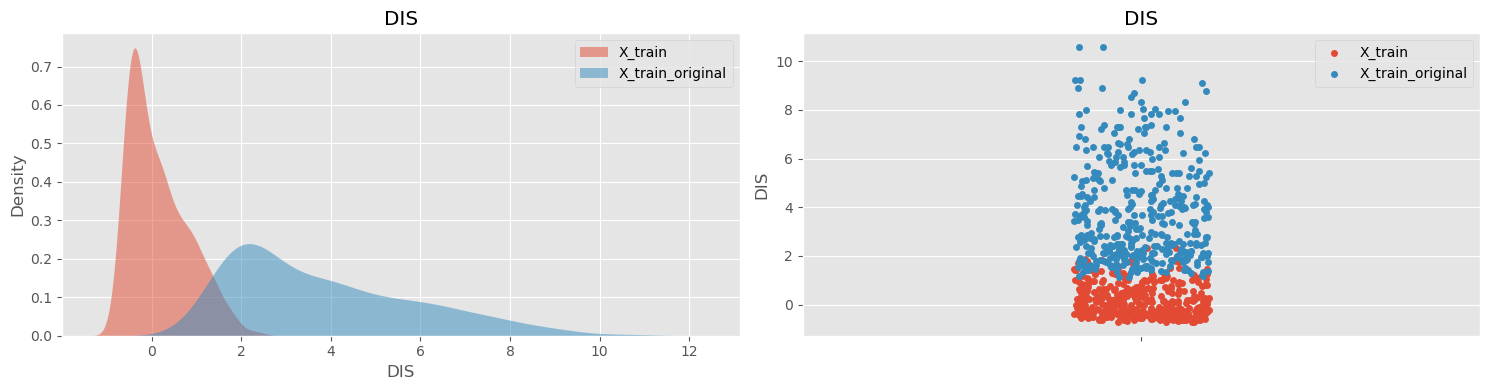

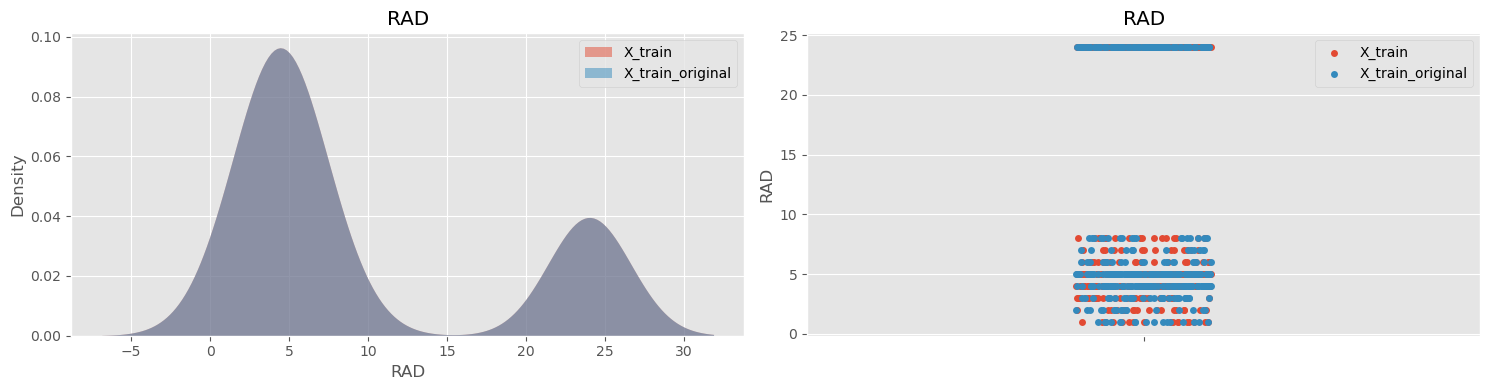

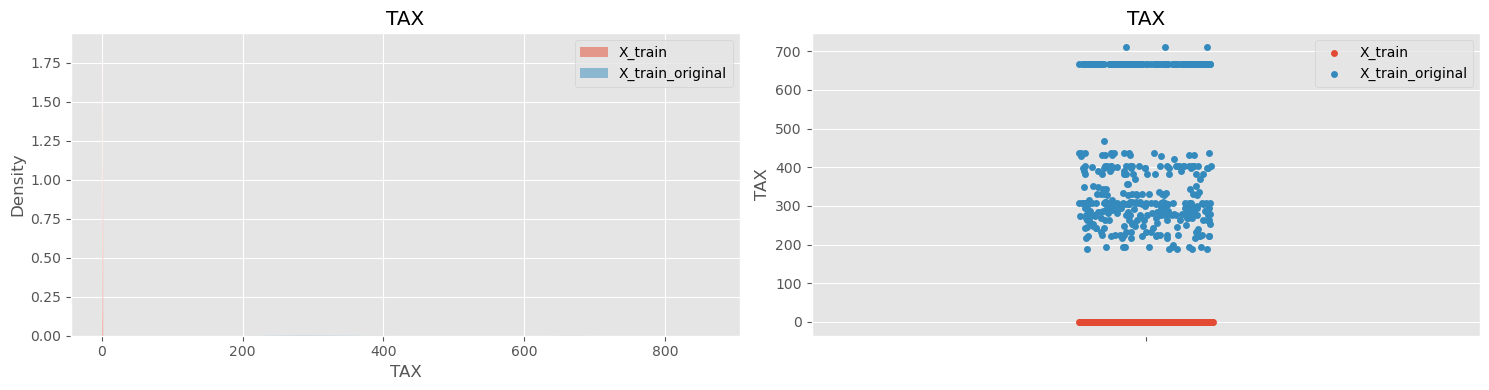

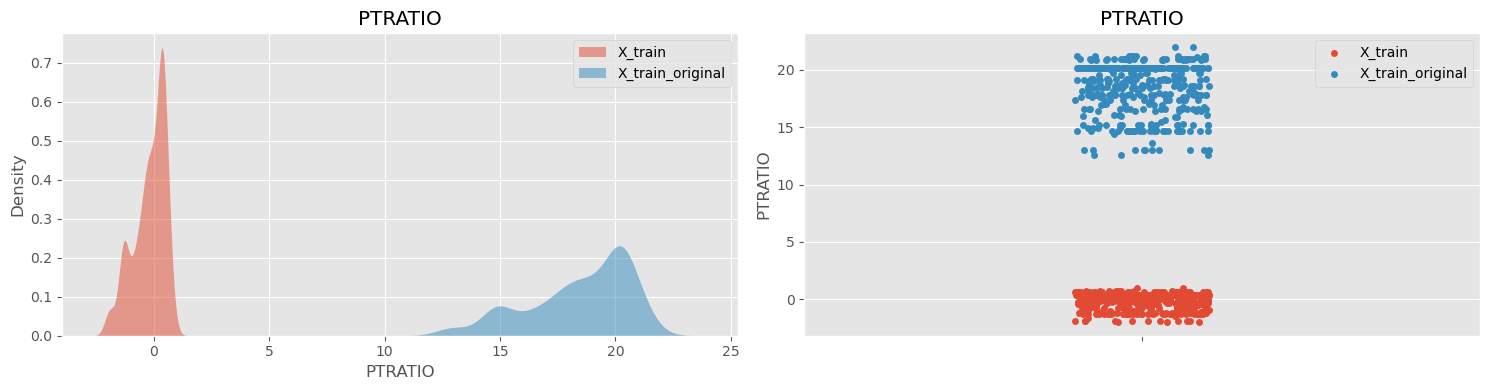

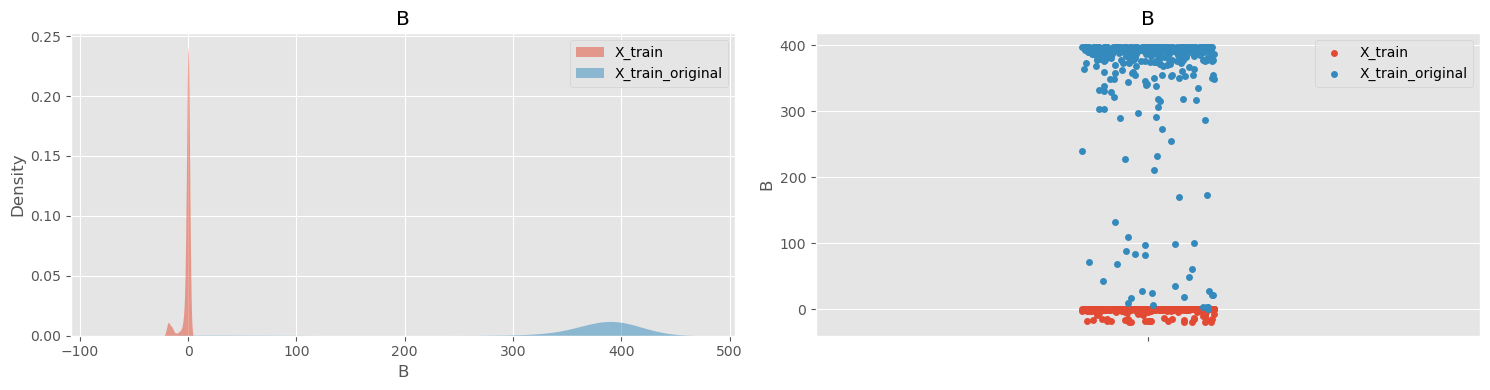

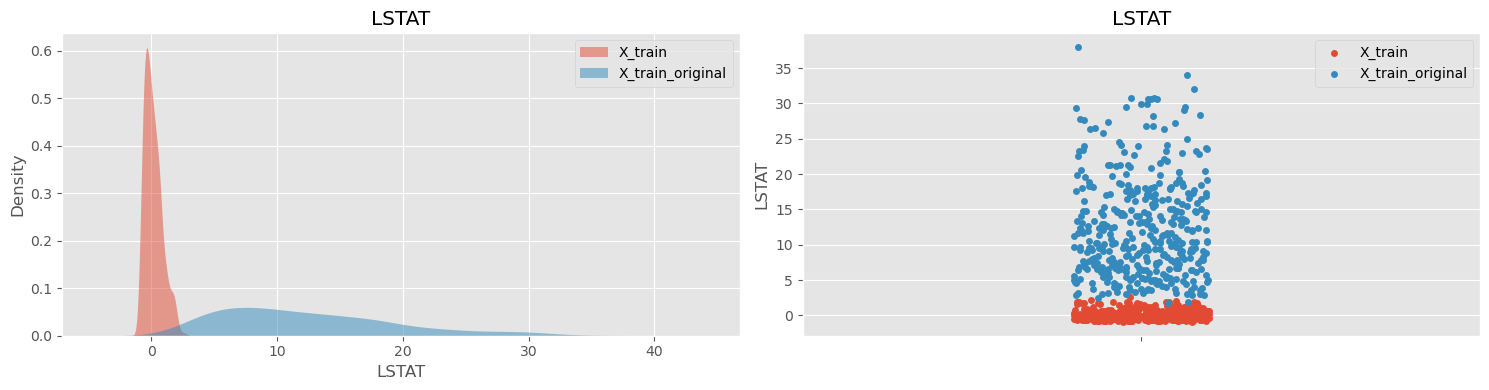

In [112]:
# Visualizamo la distribución de las variables de X_train
#=======================================================================
num_columns = len(X_train.columns)

for i, (column_train, column_original) in enumerate(zip(X_train.columns, X_train_original.columns)):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 4))
    
    x_train_values = X_train[column_train]
    x_train_original_values = X_train_original[column_original]
    
    # Gráfico de densidad
    sns.kdeplot(data=x_train_values, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=axs[0])
    sns.kdeplot(data=x_train_original_values, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=axs[0])
    axs[0].set_title(column_train)
    
    legend_labels = ['X_train', 'X_train_original']
    
    axs[0].legend(legend_labels)
   
    # Gráfico de stripplot
    sns.stripplot(data=x_train_values, ax=axs[1])
    sns.stripplot(data=x_train_original_values, ax=axs[1])
    axs[1].set_title(column_train)
    
    handles, _ = axs[1].get_legend_handles_labels()
    axs[1].legend(legend_labels)

    fig.tight_layout()

    plt.show()


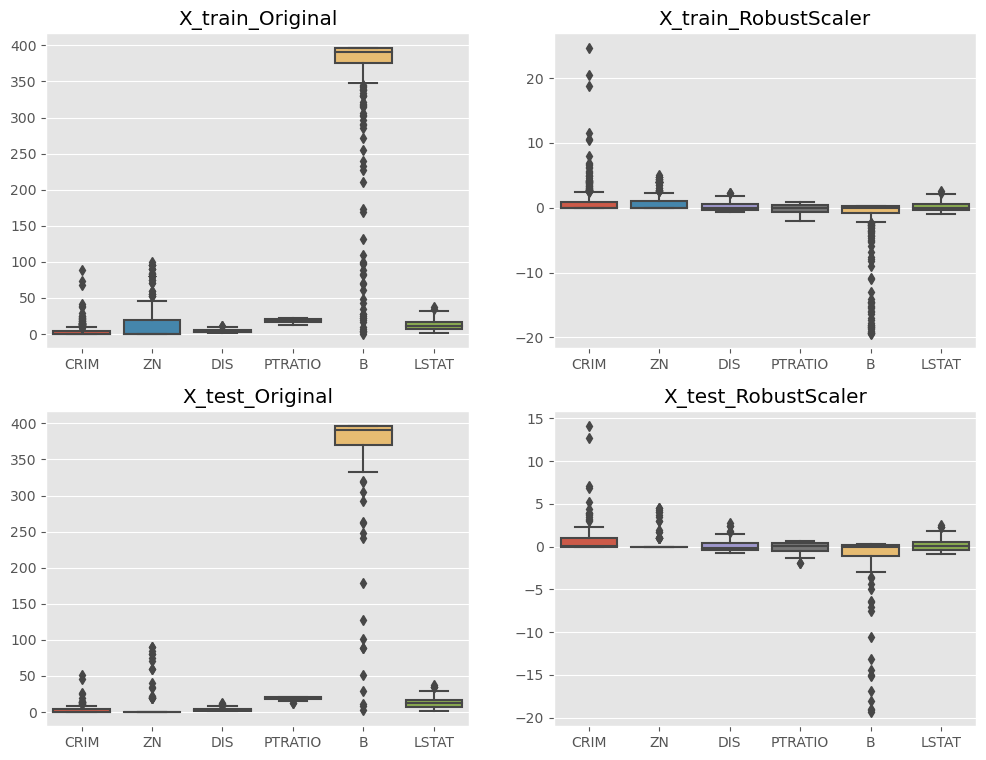

In [113]:
# Visualizamos los cambios tras el robustscaler
#=============================================================
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

# Original X_train
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_train_original[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']]), ax = ax[0, 0])
ax[0, 0].set_title('X_train_Original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

# RobustScaler X_train
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_train[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']]), ax = ax[0, 1])
ax[0, 1].set_title('X_train_RobustScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# Original X_test
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_test_original[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']]), ax = ax[1, 0])
ax[1, 0].set_title('X_test_Original')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

# RobustScaler X_test
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_test[['CRIM', 'ZN', 'DIS', 'PTRATIO', 'B', 'LSTAT']]), ax = ax[1, 1])
ax[1, 1].set_title('X_test_RobustScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

plt.show()

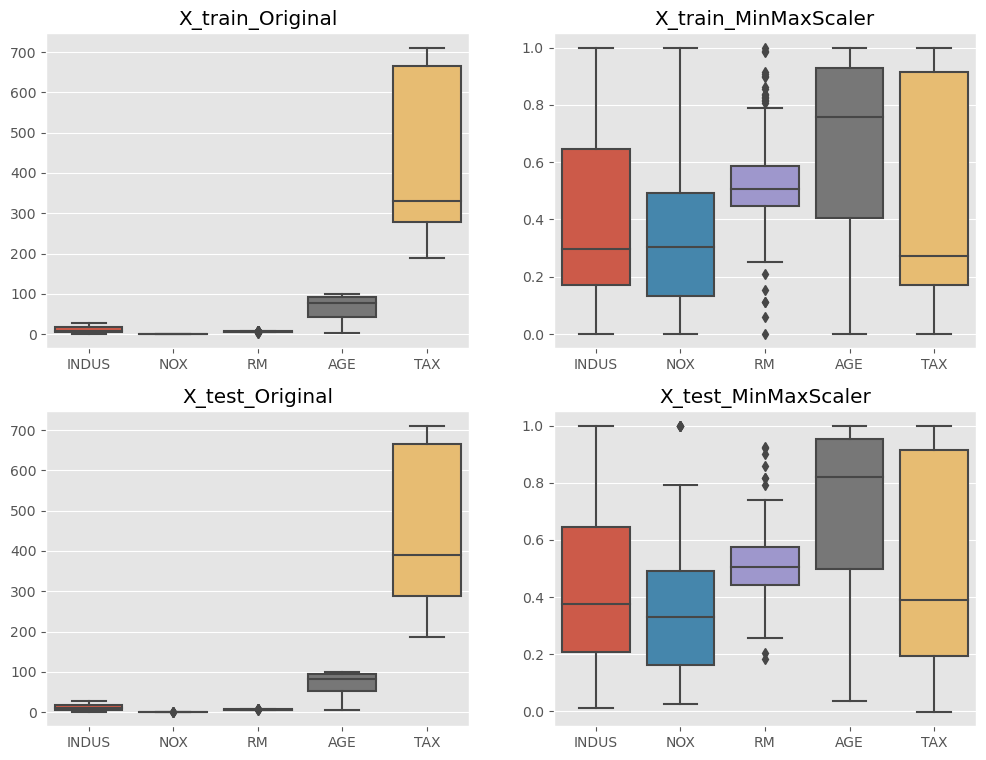

In [114]:
# Visualizamos los cambios tras el MinMaxscaler
#=============================================================
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

# Original X_train
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_train_original[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']]), ax = ax[0, 0])
ax[0, 0].set_title('X_train_Original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

# MinMaxScaler X_train
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_train[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']]), ax = ax[0, 1])
ax[0, 1].set_title('X_train_MinMaxScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# Original X_test
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_test_original[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']]), ax = ax[1, 0])
ax[1, 0].set_title('X_test_Original')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

# MinMaxScaler X_test
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(X_test[['INDUS', 'NOX', 'RM', 'AGE', 'TAX']]), ax = ax[1, 1])
ax[1, 1].set_title('X_test_MinMaxScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

plt.show()

Como podemos observar, nuestras variables originales tenian rangos bastante diferentes.

El RobustScaler ha reescalado las variables de manera que estén distribuidas alrededor de una mediana de 0 y hace que los datos sean menos sensibles a los valores atípicos.

El MinMaxScaler ha reescalado nuestras variables de manera que sus valores estén entre 0 y 1, lo que puede ser útil cuando se requiere que las variables estén acotadas dentro de un rango fijo.